# 示例：在Dynex上实现的量子玻尔兹曼机。

量子计算机用于机器学习的算法利用量子力学的力量来增强机器学习任务的各个方面。以下是一些著名的量子计算机机器学习算法的摘要：

 1. 量子支持向量机（QSVM）： QSVM是一种受量子启发的算法，旨在使用量子核函数对数据进行分类。它利用了量子叠加和量子特征映射的概念，可能在某些情况下比经典SVM算法提供计算优势。

 2. 量子主成分分析（QPCA）： QPCA是经典主成分分析（PCA）算法的量子版本。它利用量子线性代数技术从高维数据中提取主成分，可能在量子机器学习中实现更高效的降维。

 3. 量子神经网络（QNN）： QNN是经典神经网络的量子对应物。它利用了量子原理，如量子叠加和纠缠，来处理和操作数据。QNN有潜力学习复杂模式并执行分类和回归等任务，从量子并行性中受益。

 4. 量子K均值聚类： 量子K均值是经典K均值聚类算法的受量子启发的变种。它使用量子算法同时探索多个解来加速聚类过程。量子K均值有潜力加速大规模数据集的聚类任务。

 5. 量子玻尔兹曼机（QBM）： QBM是经典玻尔兹曼机的量子对应物，用于无监督学习的生成模型。QBM利用量子退火从概率分布中采样，并学习数据中的模式和结构。

 6. 量子支持向量回归（QSVR）： QSVR将QSVM的概念扩展到回归任务。它使用量子计算技术执行回归分析，可能在效率和准确性方面优于经典回归算法。

由于量子计算和神经形态计算都具有类似的效率，上述所有算法都可以在Dynex平台上高效计算，但不受可用量子比特数量、纠错或可用性的限制。

在[1]中提出了一种使用模拟的量子退火（SQA）在深度玻尔兹曼机（DBM）中进行量子采样的新方法。作者提出了一个在存在显著横向场的情况下训练网络作为量子玻尔兹曼机（QBM）的框架，用于强化学习。然而，他们证明了在需要使用链和集群的物理量子比特来模拟玻尔兹曼机的逻辑节点时，在较大的量子退火架构中嵌入玻尔兹曼机的过程存在问题，需要大量的权重和偏差。另一方面，量子退火有潜力将采样过程的速度成倍提高。

Dynex神经形态平台没有这些物理限制，因此可以克服这些扩展问题，扩展到大型的现实世界数据集和问题。

我们展示了在Dynex平台上使用量子玻尔兹曼机（QBM）实现的计算，并将其与传统的受限玻尔兹曼机（RBM）进行了比较。RBM是一个众所周知的概率无监督学习模型，由一种称为对比散度（Contrastive Divergence）的算法学习。该算法的一个重要步骤被称为吉布斯采样，这是一种从给定概率分布中返回随机样本的方法。我们决定在广泛使用的MNIST数据集上进行实验，该数据集被认为是许多机器学习和图像识别领域的标准基准。该实现遵循[2]中提供的高度优化的QUBO公式。

## 问题描述

受限玻尔兹曼机（Restricted Boltzmann Machine，RBM）是玻尔兹曼机的一种变种，它是一种受到统计物理学启发的随机生成式机器学习模型。它可以对训练数据集的概率分布进行建模。RBM是一个双部图，其中有两组节点，分别称为可见层和隐藏层。学习RBM相当于拟合其参数，使得由RBM表示的分布模拟训练数据集下的分布。不同层之间的每对顶点之间都有加权连接。同时，与每个顶点都关联有一个偏差值，包括可见层和隐藏层的顶点。

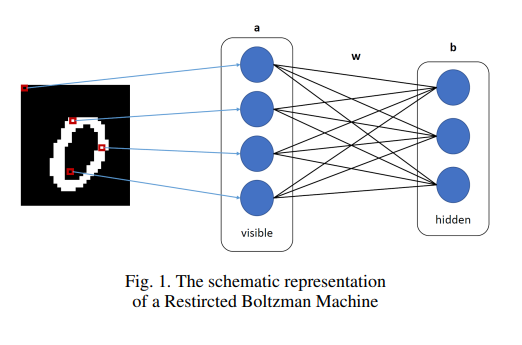

RBM是一种基于能量的概率模型，这意味着对于每种可能的状态都分配了一个标量值。观察到特定状态的概率取决于能量函数。我们可以参考参考文献中的方程。

## RBM的量子扩展

Dynex平台和D-Wave量子退火算法提供了解决这种函数的高效方式。
为了实现这一点，需要构建一个QUBO（二次无约束二进制优化）公式（11）：

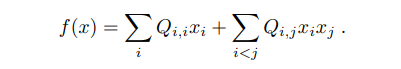

在下一步中，QUBO表示将被转化为二进制二次模型，该模型可以被Dynex神经形态采样器（以及D-Wave量子采样器）用来从模型的实际概率分布中获取样本。使用基于能量的采样器，可以从原始分布中获取准确的样本，这对于经典计算机来说计算成本高昂。与[2]中描述的经典采样不同，我们通过量子退火过程得到样本。对于量子退火器，我们唯一需要编码的输入是模型参数。在本示例中，将用Dynex神经形态采样器替代量子退火过程。

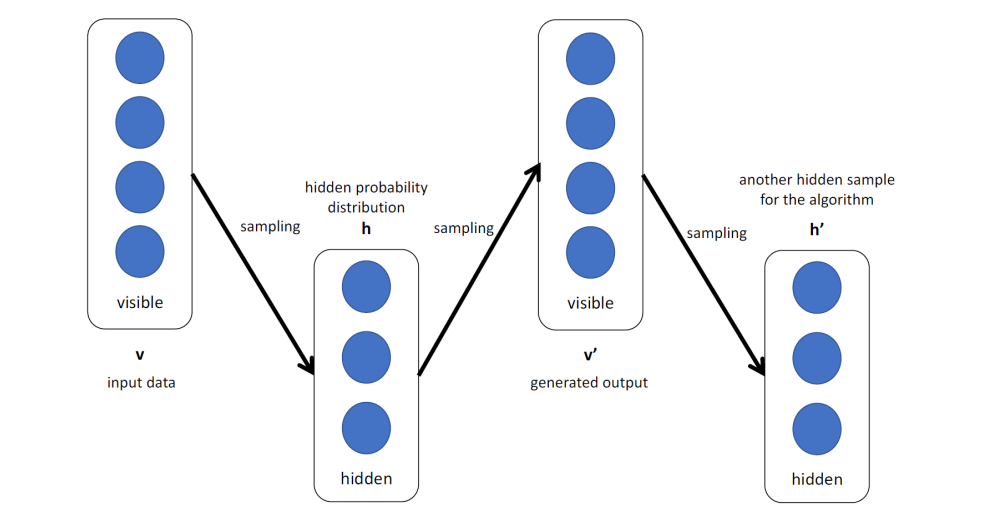
对比散度算法的示意图表示

## 实施

我们创建了一个经典的RBM模型和一个QBM模型，其中经典采样步骤被Dynex采样器的输出替代。我们在著名的MNIST数据集上测试这些模型，该数据集包括手写数字图像，共有6,000个训练样本和10,000个测试样本。为了监控训练过程的质量，我们应用了常见的均方误差（MSE）度量，用于衡量激活采样过程的输入图像与生成的图像之间的差异。我们首先导入库：

In [1]:
import dynex
import dimod

In [2]:
from itertools import product
import json
import random 
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import timeit
from tqdm import tqdm_notebook as tqdm
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import img_as_bool
import cv2 as cv
import random
import pandas as pd

In [4]:
import QRBM.MSQRBM
import QRBM.classicalRBM

然后，我们定义设置。MNIST数据集包含每个大小为28 x 28像素的图像。我们还设置了用于训练传统RBM的周期数。网络的输入大小为784（基于图像大小），并且隐藏层的大小为60。

In [5]:
image_height = 28
image_width = 28

# 图像将被展平
len_x = image_height * image_width
len_y = 0

digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
THRESHOLD = 100
n_hidden = 60
qpu = False
epochs = 500 
lr = 0.1

MNIST数据集可以从 https://www.kaggle.com/datasets/oddrationale/mnist-in-csv 下载并加载到对象中

In [6]:
mnist_dataset = pd.read_csv('datasets/mnist_train.csv')
mnist_test = pd.read_csv('datasets/mnist_test.csv')

我们随后准备训练集和测试集：

In [7]:
X_train = mnist_dataset.values[:,1:]
X_train2 = mnist_dataset.values[:,:]

X_test = mnist_test.values[:,1:]
X_test2 = mnist_test.values[:,:]

X_train3 = []
X_test3 = []

for digit in digits:
    X_train3.append(mnist_dataset.values[np.where(mnist_dataset.values[:,0] == digit), 1:][0])
    X_test3.append(mnist_test.values[np.where(mnist_test.values[:,0] == digit), 1:][0])

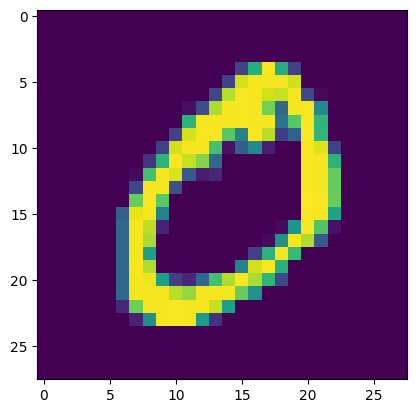

In [8]:
imgs = []
imgs_test = []
for digit_index in range(len(digits)):
    imgs.append(np.resize(X_train3[digit_index], (len(X_train3[digit_index]), 28, 28)) / 255)
    imgs_test.append(np.resize(X_test3[digit_index], (len(X_test3[digit_index]), 28, 28)) / 255)
    
plt.imshow(imgs[0][0])
plt.show()

在将数据输入模型之前，我们需要执行一些预处理步骤，因为RBM只能处理二进制数据。我们使用亮度阈值100像素（在0÷255灰度范围内）将原始的MNIST图像转换为二进制表示，并将图像展平，以便它们适应长度为28 x 28 = 784的一维RBM可见层。

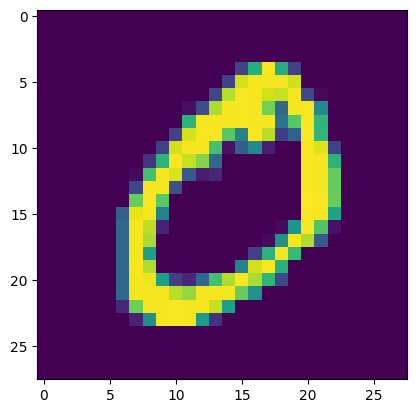

In [9]:
# 手机图象
images_resized = []
images_resized_test = []
for digit_index in range(len(digits)):
    images_resized.append([resize(img, (image_width, image_height), anti_aliasing=True) for img in imgs[digit_index]])
    images_resized_test.append([resize(img, (image_width, image_height), anti_aliasing=True) for img in imgs_test[digit_index]])

plt.imshow(images_resized[0][0])
plt.show()

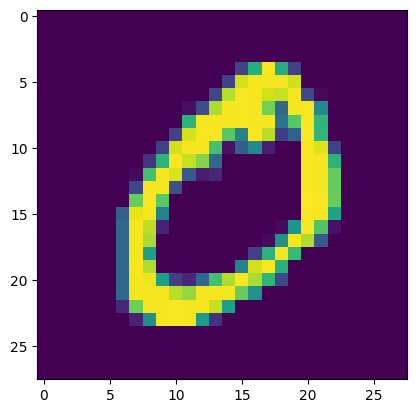

In [10]:
# 标准化图像
images_normalized = []
images_normalized_test = []

for digit_index in range(len(digits)):
    images_normalized.append([cv.normalize(image_resized, image_resized, 0, 255, cv.NORM_MINMAX) for image_resized in images_resized[digit_index]])
    images_normalized_test.append([cv.normalize(image_resized, image_resized, 0, 255, cv.NORM_MINMAX) for image_resized in images_resized_test[digit_index]])

plt.imshow(images_normalized[0][0])
plt.show()

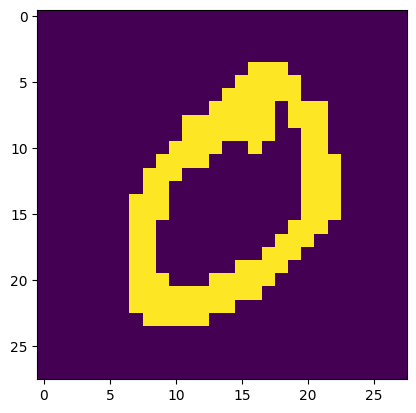

In [11]:
# 转换为二进制
data = []
data_test = []
for digit_index in range(len(digits)):
    data.append([np.where(image_resized > THRESHOLD, 1, 0) for image_resized in images_resized[digit_index]])
    data_test.append([np.where(image_resized > THRESHOLD, 1, 0) for image_resized in images_resized_test[digit_index]])

plt.imshow(data[0][0])
plt.show()

In [12]:
# 扁平化图像
input_data = []
input_data_test = []
for digit_index in range(len(digits)):
    input_data.append([x.flatten().tolist() for x in data[digit_index]])
    input_data_test.append([x.flatten().tolist() for x in data_test[digit_index]])
    

In [13]:
# 将图层特征保存到文件：
import pickle
pickle.dump(input_data, open('datasets/MNIST.pickle', 'wb'))
pickle.dump(input_data_test, open('datasets/MNIST_test.pickle', 'wb'))

现在，经过预处理后，我们可以准备并打乱训练数据和测试数据：

In [14]:
result_picture_tab = []
for digit_index in range(len(digits)):
    result_picture_tab.append(np.mean(input_data_test[digit_index], axis = 0))

In [15]:
# 打乱训练数据
for digit in digits:
    flat_input_data = [item for sublist in input_data for item in sublist]
    flat_input_data_test = [item for sublist in input_data_test for item in sublist]

random.shuffle(flat_input_data)
random.shuffle(flat_input_data_test)

## 传统RBM

为了对RBM的实现进行基准测试和验证其正确性，我们通过最大化对一些训练集V分配的概率乘积来训练传统的RBM，并使用对比散度（CD）[3]优化权重向量：

1. 取一个训练样本v，计算隐藏单元的概率，并从该概率分布中采样得到隐藏激活向量h。

2. 计算v和h的外积，并将其称为正梯度。

3. 从h中采样得到可见单元的重构v'，然后从中重新采样隐藏激活h'。（Gibbs采样步骤）

4. 计算v'和h'的外积，并将其称为负梯度。

5. 将权重矩阵W的更新定义为正梯度减去负梯度，乘以一定的学习率。

6. 类似地更新偏置a和b：a = epsilon(v-v')，b = epsilon(h-h')。
            

我们还添加了学习率衰减（learning rate decay）机制，它会在每几次迭代中降低学习率α。这个机制用于在接近最优解时进一步优化学习过程。我们还添加了动量（Momentum），它是基于梯度的算法（如SGD或Adam）的一种流行改进方法。该方法的主要思想是不仅基于当前数据样本计算梯度，还考虑了先前的梯度方向。另外，我们还添加了一种不同变体的学习算法，称为持续对比散度（persistent CD）。其主要区别是在大多数迭代中，我们使用上一次迭代的v'向量来计算负阶段（negative phase）的梯度，而不是使用输入数据向量v。

In [16]:
bm = QRBM.classicalRBM.classicalRBM(n_visible=len_x, n_hidden=n_hidden, use_tqdm=True);
bm.image_height = image_height
bm.tqdm = tqdm
bm.result_picture_tab = result_picture_tab

  0%|          | 0/500 [00:00<?, ?it/s]

Better model found at epoch 0 mse= 0.30739795918367346
Better model found at epoch 1 mse= 0.2997448979591837
Better model found at epoch 2 mse= 0.20535714285714285
Better model found at epoch 7 mse= 0.17857142857142858
Better model found at epoch 8 mse= 0.1568877551020408
Better model found at epoch 9 mse= 0.1556122448979592
Better model found at epoch 14 mse= 0.1096938775510204
Better model found at epoch 18 mse= 0.10586734693877552
Better model found at epoch 24 mse= 0.09438775510204081
Better model found at epoch 26 mse= 0.07908163265306123
Better model found at epoch 47 mse= 0.058673469387755105
Better model found at epoch 68 mse= 0.04974489795918367
lr= 0.09000000000000001
Better model found at epoch 106 mse= 0.042091836734693876
Better model found at epoch 198 mse= 0.036989795918367346
lr= 0.08100000000000002
Better model found at epoch 200 mse= 0.03188775510204082
Better model found at epoch 214 mse= 0.030612244897959183
Better model found at epoch 236 mse= 0.029336734693877552


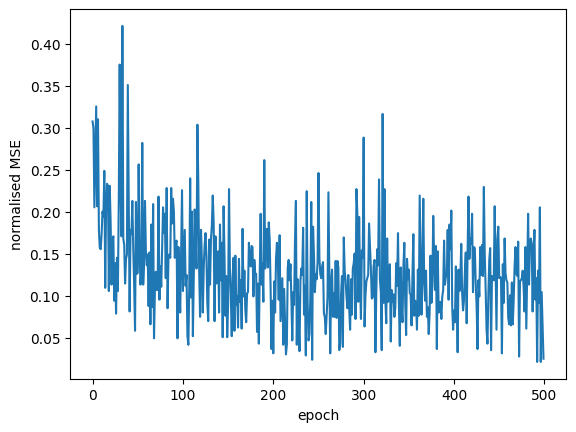

In [17]:
bm.train(flat_input_data, len_x, len_y, epochs = epochs, lr = lr, lr_decay = 0.1)

随着时代数量的增加，标准化MSE值也在变化，这是一个双位数问题。

## 在Dynex神经形态平台上的QBM。

在我们的QBM中，经典的采样步骤被Dynex神经形态采样器的输出所取代：

In [18]:
bm = QRBM.MSQRBM.MSQRBM(n_visible=len_x, n_hidden=n_hidden, qpu=qpu)
bm.image_height = image_height
bm.tqdm = tqdm
bm.result_picture_tab = result_picture_tab

我们预计QBM能够更快地演化到更低的MSE值，因此将训练时代减少96%至仅20个训练迭代。

  0%|          | 0/10 [00:00<?, ?it/s]

Better model found at epoch 0 mse= 0.14923469387755103
lr =  0.09000000000000001
Better model found at epoch 1 mse= 0.09948979591836735
Better model found at epoch 2 mse= 0.06505102040816327
lr =  0.08100000000000002
lr =  0.07290000000000002
lr =  0.06561000000000002
lr =  0.05904900000000002


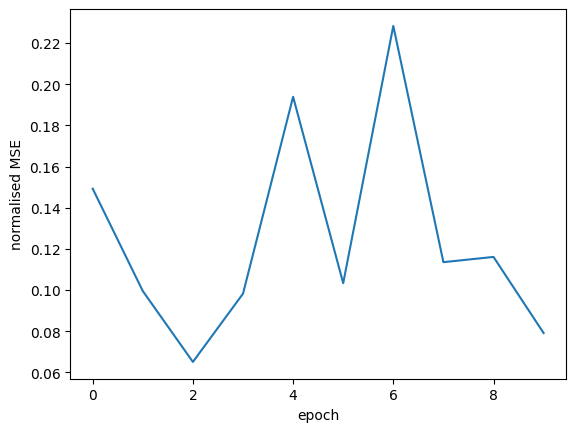

In [19]:
bm.train(flat_input_data, len_x, len_y, epochs = 10, lr = lr, lr_decay = 0.1)

## QBM比传统的RBM更快

QBM比传统的RBM更快地演化到一个较低的均方误差（MSE），这意味着需要更少的训练迭代次数。此外，实现的MSE更低，这意味着QBM创建的模型具有更高的准确性。这个结果与参考文献中的结果一致。然而，[1]证明了将Boltzmann机嵌入更大的量子退火器体系结构中的过程是有问题的，因为使用物理量子比特的链和簇来模拟Boltzmann机的逻辑节点需要大量的权重和偏置，由于可用量子比特数量的限制。Dynex神经形态平台提供了一种更可扩展的替代方案，并可用于训练具有数百万变量的模型。特别是当要训练真实世界的模型时，训练迭代次数和准确性非常重要。

参考文献:

[1] D. Crawford, A. Levit, N. Ghadermarzy, J.S. Oberoi, P. Ronagh, 使用量子Boltzmann机的强化学习, arXiv: 1612.05695 (2016).

[2] K. Kurowski, M. Slysz, M. Subocz, R. Rozycki, 应用基于量子退火的受限Boltzmann机进行MNIST手写数字分类, CMST, Volume 27 (3) 2021, 99-107

[3] https://en.wikipedia.org/wiki/Restricted_Boltzmann_machine

[4] K. Kurowski, J. Weglarz, M. Subocz, R. Rozycki, G. Waligóra, 用于解决工作车间调度问题的混合量子退火启发式方法，[In:] Computational Science – ICCS 2020. Lecture Notes in Computer Science 12142, Eds. V.V. Krzhizhanovskaya, G. Závodszky, M.H. Lees, J.J. Dongarra, P.M.A. Sloot, S. Brissos, J. Teixeira, Springer, Cham (2020).

[5] J. Biamonte, P. Wittek, N. Pancotti, P. Rebentrost, N. Wiebe, S. Lloyd, 量子机器学习，Nature 549，195-202（2017）。

[6] S. Lloyd, M. Mohseni, P. Rebentrost, 监督和无监督机器学习的量子算法，arXiv: 1307.0411（2013）。

[7] M. Benedetti, J. Realpe-Gomez, A. Perdomo-Ortiz, 量子辅助Helmholtz机器：一种用于近期设备中工业数据集的量子-经典深度学习框架，arXiv: 1708.09784（2017）。